In [3]:



#Create a Client Object:

#lidar




In [4]:
!python -m pip install tdmclient

NameError: name 'node' is not defined

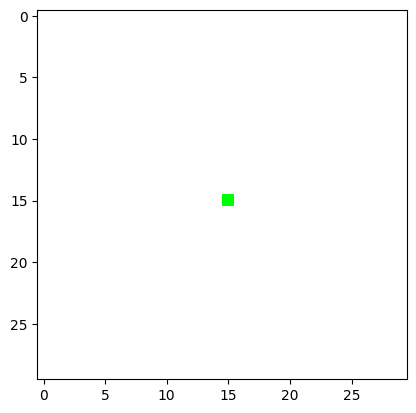

: 

In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt 


## make  a numpy array of shape 300,300,3 to represent a cost map
cost_map = np.zeros((30,30,3),dtype=np.uint8)
#make everything white
cost_map[:,:,:] = (255,255,255)

cost_map[15,15] = (0,255,0)

#set center map to 1

#set the border of the map to 1
#show map

plt.imshow(cost_map)
await node.wait_for_variables({"prox.horizontal"})

#5cm == 1455
#2cm == 2685
#0 cm == 4003
#FIXME: Magic number
ratio = 5/(4003-1455)

# Sensor angles in degrees


print(ratio*(4003-2685))

#update cost map (each block is 1cm)
#return a list of tuples of (dist float,angle float) (impose type)



    



In [ ]:

def getObstaclePosition() -> list:
    """
    Calculates the positions of obstacles based on sensor readings.
    The function iterates through 7 sensors, calculates the distance and angle
    for each sensor, and appends the position to a list. If the distance is greater
    than 5, it appends (-1, 0) to indicate no obstacle detected within the threshold.
    Returns:
        list of tuples: A list of tuples where each tuple contains the distance (float)
                        and angle (float) of the detected obstacle.
    """
    pos = []
    for i in range(7):
        ##if 2 sensors are close to each other link the 2 dots
        aw(node.wait_for_variables({"prox.horizontal"}))
        aw(client.sleep(0.01))
        prox=node.v.prox.horizontal
        angle = sensor_angles[list(sensor_angles.keys())[i]]
        distance = ratio*(4003-list(prox)[i])
        if distance > 5:
            pos.append((-1,0))
        else:
            pos.append((distance,angle))
        
     
    return pos

C:\Users\marin\AppData\Local\Temp\ipykernel_10304\1909962019.py:5: RuntimeWarning: coroutine 'Thymio.__init__' was never awaited
  thymio = th.Thymio()


TypeError: __init__() should return None, not 'coroutine'

In [ ]:
import vision.detect_aruco as da
import threading
import queue
import cv2
import time
import matplotlib.pyplot as plt
qpos = queue.Queue(maxsize=2)
qimg = queue.Queue(maxsize=2)
qresult = queue.Queue(maxsize=2)
random_path = [(0,0), (100,100), (200,200), (300,300), (400,400), (500,500), (600,600), (700,700), (800,800), (900,900), (1000,1000)]
def draw_path(img, path):
    for i in range(len(path)-1):
        cv2.line(img, path[i], path[i+1], (0, 255, 0), 2)
    return img
#start the thread
t = threading.Thread(target=da.main,args=(qpos,qimg,qresult))
t.start()

while True:
    img = qimg.get()
    draw_path(img, random_path)
    cv2.imshow("aruco", img)
    cv2.waitKey(1)  # Add a short delay to refresh the window
    pos =qpos.get()
    result = qresult.get()
    print(img.shape,result, end="\r")
    if result == False:
        break
t.join()

[INFO] detecting 'DICT_ARUCO_ORIGINAL' markers...
[[  60.   12.]
 [1172.   11.]
 [1211.  619.]
 [   9.  610.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  60.   12.], 302)
 [1172.   11.]
 [1212.  619.]
 [   9.  610.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  60.   12.] True)
 [1173.   11.]
 [1212.  620.]
 [   9.  610.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  60.   12.] True)
 [1172.   10.]
 [1211.  619.]
 [   9.  610.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  60.   12.] True)
 [1172.   10.]
 [1212.  619.]
 [   9.  610.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  60.   12.] False
 [1172.   10.]
 [1212.  619.]
 [   9.  610.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  60.   12.] True)
 [1172.   10.]
 [1212.  619.]
 [   9.  610.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  60.   12.] True)
 [1172.   10.]
 [1212.  619.]
 [   9.  610.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  60.   12.] True)
 [1172.   11.]
 [1212.  619.]
 [   9.  

KeyboardInterrupt: 

[[  81.   37.]
 [1178.   44.]
 [1242.  658.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   44.]
 [1242.  658.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   44.]
 [1242.  658.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   44.]
 [1241.  658.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   44.]
 [1241.  658.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   44.]
 [1241.  658.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   44.]
 [1240.  657.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1179.   44.]
 [1239.  657.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   44.]
 [1241.  657.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [128

[[  81.   37.]
 [1178.   43.]
 [1240.  656.]
 [  72.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   43.]
 [1240.  656.]
 [  72.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   43.]
 [1240.  656.]
 [  72.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   44.]
 [1235.  656.]
 [  72.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   43.]
 [1238.  656.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   44.]
 [1240.  657.]
 [  72.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1179.   44.]
 [1240.  656.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 268)
 [1179.   44.]
 [1240.  656.]
 [  72.  641.]] [[   0.    0.]
 [1280.    0.]
 [1280.  720.]
[[  81.   37.]1, 269)
 [1178.   43.]
 [1240.  656.]
 [  73.  641.]] [[   0.    0.]
 [1280.    0.]
 [128

Finding maximum resolution...
Testing common resolutions...
Trying 1920x1080...
Set 1920x1080
Trying 1920x1080 -> Actual: 1920x1080
Trying 1280x720...


KeyboardInterrupt: 

In [2]:
import cv2
import matplotlib.pyplot as plt

# Try setting a high resolution

cap = cv2.VideoCapture(1)  # Replace 3 with the correct index
print("Setting resolution to 1920x1080")
# Try setting a high resolution
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
print("Resolution set to: (" + str(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) + ", " + str(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) + ")")


if cap.isOpened():
    print("Camera successfully opened!")
else:
    print("Failed to open the camera.")





Setting resolution to 1920x1080
Resolution set to: (1920.0, 1080.0)
Camera successfully opened!


In [1]:
_,frame = cap.read()

plt.imshow(frame)




NameError: name 'cap' is not defined

In [ ]:
import cv2
print(cv2.__version__)

4.10.0
